In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

def data(csv_in):
    df = pd.read_csv(csv_in)
    df['label'] = df['label'].map({1:1, 0:-1, 'M':1, 'B':-1})
    train, validate = train_test_split(df, test_size=0.2, stratify=df.label)

    X = train.drop(columns=['label']).values
    means, stds = X.mean(axis=0), X.std(axis=0)
    X = (X - means) / stds
    X = np.hstack((X, np.ones((X.shape[0], 1))))
    y = train[['label']].values

    X_val = validate.drop(columns=['label']).values
    means, stds = X_val.mean(axis=0), X_val.std(axis=0)
    X_val = (X_val - means) / stds
    X_val = np.hstack((X_val, np.ones((X_val.shape[0], 1))))
    y_val = validate[['label']].values
    return X, X_val, y, y_val


83
step = 62
w = [[ 0.03830149 -0.14899469  0.03211724  0.42231262  0.27430277  0.18179118
   1.0334148   0.22221825  0.15196483 -0.03269411 -0.05162612 -0.20558703
  -0.06098906 -0.02546099  0.14440108  0.25372499  0.44980837  0.20301818
   0.20559114  0.37222177  0.29461622  0.41547623  0.6467296   0.15438265
  -0.924253   -0.59172051 -0.90793185  0.25025722 -0.31928804 -0.25452654
  -0.09316033 -0.09469705 -0.41053018 -0.13361764 -0.35388179  0.0518487
  -0.19925828 -0.1388022  -0.30752341 -0.13217725 -0.39247885 -0.57635432
  -0.25462875 -0.42436144 -0.688824   -0.65743392 -0.15505592 -0.38139797
  -0.29903751 -0.17560697 -0.03559321  0.81484422  0.96541351  0.31063676
   0.30043987  0.71836114  0.43500479 -0.88504771]]


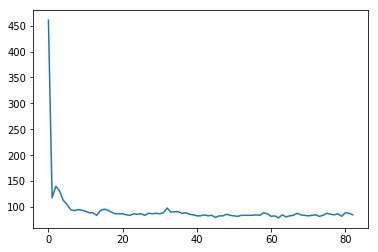

In [21]:

def sigmoid(z):
    return 1 / (1 + np.exp(-z))


def step(w, nu):
    nn = [np.random.randint(X.shape[0]) for _ in range(100)]
    gr = 0
    for n in nn:
        z = np.dot(X[n],w.T)*y[n]
        
        gr += X[n]*y[n]*sigmoid(-z)
    
    w += nu*gr/100
    return w

def main(X, X_val, y, y_val):
    w = np.zeros((1, X.shape[1]))    
    e = [sum(abs(np.sign(np.dot(X_val,w.T))-y_val))[0]/2]
    nu = 1
    s = 0
    m = 0
    while m<500:
        m += 1
        if s<20:
            w = step(w, nu)
            #nu = nu*0.99
            e1 = sum(abs(np.sign(np.dot(X_val,w.T))-y_val))[0]/2
            if e1>e[-1-s]:
                s+=1
            else:
                s=0
                w_best = w
                m_best = m 
            e.append(sum(abs(np.sign(np.dot(X_val,w.T))-y_val))[0]/2)
        else:
            print(m)
            m=500


    print('step =', m_best)
    print('w =', w_best)    
    plt.plot(e)

X, X_val, y, y_val = data('/Users/dashabalashova/1_1_5_ML_Bioinf/data/spam.csv')
main(X, X_val, y, y_val)


62
step = 41
w = [[ 0.62939047  0.60914845  0.62115711  0.63643381  0.21545137  0.07579064
   0.58766224  0.74763367  0.12253427 -0.46398021  0.58113744 -0.13877472
   0.45895202  0.53806938  0.16278646 -0.32221829 -0.17145398  0.06335461
  -0.0474618  -0.39059671  0.86135009  0.80861541  0.82439058  0.81323635
   0.7068194   0.25126369  0.54792672  0.80698882  0.64146854  0.12002722
  -0.49697151]]


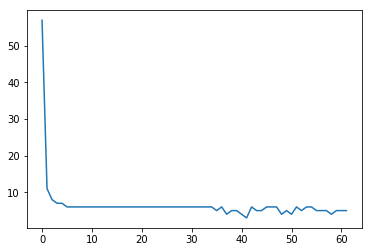

In [22]:
X, X_val, y, y_val = data('/Users/dashabalashova/1_1_5_ML_Bioinf/data/cancer.csv')
main(X, X_val, y, y_val)